![title](img/tutorial_front.png)

![hardware](img/quantum_hardware.png)

![motivation](img/motivation.png)

### > Introducing Quantum Information Science Kit (qiskit)
### > Quantum Circuits
### > Transpilation

### * Another important element that will not be covered: Noisy quantum computing

## This Jupyter notebook is available at https://github.com/dkp-quantum/Tutorial

## Further Information

#### * Qiskit tutorial: https://github.com/Qiskit/qiskit-iqx-tutorials

#### * Qiskit online textbook: https://community.qiskit.org/textbook/

#### * Qiskit documentation: https://qiskit.org/documentation/

#### * Qiskit GitHub: https://github.com/Qiskit

## https://qiskit.org/
![figure1](img/qiskit_front_new.png)

![qiskit](img/workflow.png)

## Qiskit Programming at IBM Quantum Experience: https://quantum-computing.ibm.com/
![IBM QE](img/ibm_qe_1.png)

![IBM QE](img/ibm_qe_2.png)

# To run it on your computer:
## Download & Install Anaconda (Python 3.7) from http://www.anaconda.com/distribution
![figure2](img/anaconda.png)

## <font color = black>For a new qiskit installation:</font>
pip install qiskit

## <font color = black>For an update:</font>
pip install -U qiskit

### Updating to the new IBM Q Experience

Since July 2019 (and with version 0.3 of this qiskit-ibmq-provider package), the IBMQProvider defaults to using the new __IBM Q Experience__, which supersedes the legacy Quantum Experience and Qconsole. The new __IBM Q Experience__ is also referred as v2, whereas the legacy one and Qconsole as v1.

If you have credentials for the legacy Quantum Experience or Qconsole stored in disk, you can make use of IBMQ.update_account() helper. This helper will read your current credentials stored in disk and attempt to convert them:

In [8]:
# If you already have saved IBM credentials with previous version, 
# update your credentials that is stored in disk
from qiskit import IBMQ
IBMQ.update_account()

Found 0 credentials.
No credentials available for updating could be found. No action will be performed.


In [9]:
# import
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_city, plot_state_paulivec
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor

In [3]:
# Create a quantum register with 2 qubits
q = QuantumRegister(2,'q')
# Form a quantum circuit
# Note that the circuit name is optional
qc = QuantumCircuit(q,name="first_qc")
# Display the quantum circuit
qc.draw()

In [4]:
# Create a classical register with 2 bits
c = ClassicalRegister(2,'c')

meas = QuantumCircuit(q,c,name="first_m")
meas.barrier(q)
meas.measure(q[0], c[0])
meas.measure(q[1], c[1])
#meas.measure(q[3], c[3])
#meas.measure(q[4], c[4])
meas.draw()

In [5]:
# Add a x gate on qubit 0.
qc.x(0)
# Add a Hadamard gate on qubit 0, putting this in superposition.
qc.h(0)
# Add a CX (CNOT) gate on control qubit 0 
# and target qubit 1 to create an entangled state.
qc.cx(0, 1)
qc.draw()

In [6]:
# Quantum circuits can be added with + operations
# Add two pre-defined circuits
qc_comp=qc+meas
qc_comp.draw()

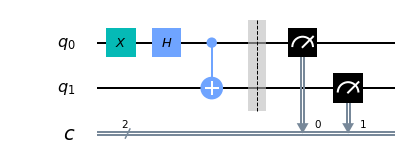

In [7]:
# Draw the quantum circuit in a different (slightly better) format
qc_comp.draw(output='mpl')

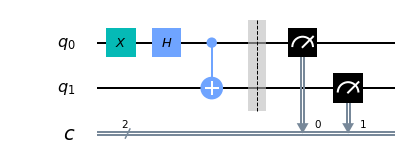

In [8]:
# Create the quantum circuit with the measurement in one go.
qc_tot = QuantumCircuit(q,c,name="2q_all")
qc_tot.x(0)
qc_tot.h(0)
qc_tot.cx(0,1)
qc_tot.barrier()
qc_tot.measure(0,0)
qc_tot.measure(1,1)
qc_tot.draw(output='mpl')

## Current qiskit release includes three simulator backends

1. __QASM Simulator__: It emulates execution of a quantum circuits on a real device and returns __measurement counts__. It includes highly configurable noise models and can even be loaded with automatically generated approximate noise models based on the calibration parameters of actual hardware devices.

    * What is __QASM__? QASM = Quantum Assembly Language (see https://arxiv.org/abs/1707.03429 for more detail)
    

2. __Statevector Simulator__: It simulates the ideal execution of a quantum circuit and returns __the final quantum state vector__ of the device at the end of simulation.

3. __Unitary Simulator__: It allows simulation of the final unitary matrix implemented by an ideal quantum circuit. This only works if all the elements in the circuit are unitary operations.

In [9]:
# Use Aer's qasm_simulator
backend_q = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is default.
job_sim1 = execute(qc_comp, backend_q, shots=1024)

In [10]:
job_sim1.status()

<JobStatus.DONE: 'job has successfully run'>

In [11]:
# Grab the results from the job.
result_sim1 = job_sim1.result()
result_sim1

Result(backend_name='qasm_simulator', backend_version='0.3.2', date=datetime.datetime(2020, 2, 3, 16, 9, 33, 823956), header=Obj(backend_name='qasm_simulator', backend_version='0.3.2'), job_id='8490dc4e-21f2-45f1-a7af-aa7a4c1d2520', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.004167092}, qobj_id='c3aca171-ae9c-4cc8-b5dd-b2d03220061c', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=527, 0x3=497)), header=Obj(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], memory_slots=2, n_qubits=2, name='circuit2', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=3335666370, shots=1024, status='DONE', success=True, time_taken=0.003935149000000001)], status='COMPLETED', success=True, time_taken=0.010936975479125977)

In [12]:
result_sim1.get_counts(qc_comp)

{'00': 527, '11': 497}

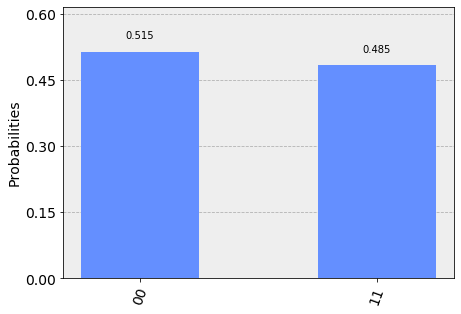

In [13]:
plot_histogram(result_sim1.get_counts(qc_comp))

In [14]:
# Use Aer's statevector_simulator
backend_sv = Aer.get_backend('statevector_simulator')

# Execute the circuit on the statevector simulator.
job_sim2 = execute(qc, backend_sv)

In [15]:
# Grab the results from the job.
result_sim2 = job_sim2.result()
# Output the entire result
job_sim2.result()

Result(backend_name='statevector_simulator', backend_version='0.3.2', date=datetime.datetime(2020, 2, 3, 16, 9, 40, 875977), header=Obj(backend_name='statevector_simulator', backend_version='0.3.2'), job_id='34ab5aae-4e0d-47d0-9b3d-cae9a778ec14', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000298175}, qobj_id='2c06d41d-114c-4c2a-ae89-b51f73ae019c', results=[ExperimentResult(data=ExperimentResultData(statevector=[(0.7071067811865475+0j), 0j, 0j, (-0.7071067811865476+0j)]), header=Obj(clbit_labels=[], creg_sizes=[], memory_slots=0, n_qubits=2, name='first_qc', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), meas_level=2, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=3555498014, shots=1, status='DONE', success=True, time_taken=0.000115606)], status='COMPLETED', success=True, time_taken=0.007314205169677734)

In [16]:
# See output state as a vector
outputstate = result_sim2.get_statevector(qc, decimals=5)
print(outputstate)

[ 0.70711+0.j  0.     +0.j  0.     +0.j -0.70711+0.j]


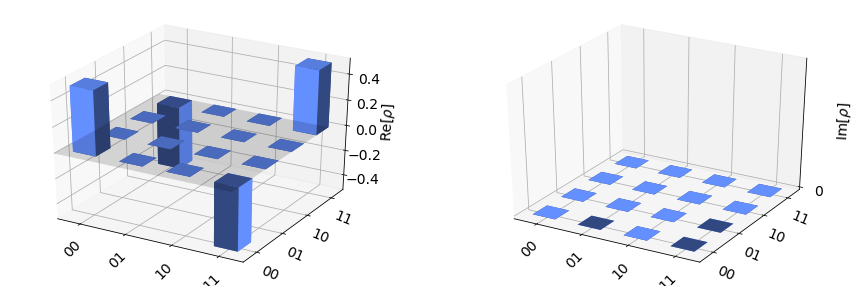

In [17]:
# Visualize density matrix
plot_state_city(outputstate)

In [18]:
# Examine state fidelity, compare with a basis state |111>
sf1=state_fidelity(basis_state('11', 2), outputstate)
# Examine state fidelity w.r.t the desired state
desired_state=[1,0,0,-1]/np.sqrt(2)
sf2=state_fidelity(desired_state, outputstate)
print(sf1)
print(sf2)

0.5000045521
1.0000091041999999


## Exercise 1:  
## Design a quantum circuit to create the following 4-qubit entangled state: $\frac{|0000\rangle+|1111\rangle}{\sqrt{2}}$. 
## Check the answer with the QASM simulation and by plotting the histogram of the measurement statistics.

In [19]:
# Create a quantum register with 4 qubits
q4 = QuantumRegister(4,'q')
# Create classical registers for measurement
c4 = ClassicalRegister(4,'c')
# Form a quantum circuit
# Note that the circuit name is optional
ex1_qc = QuantumCircuit(q4,c4,name="ex1")
# Display the quantum circuit
ex1_qc.draw()

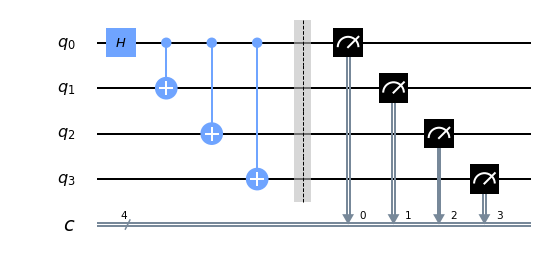

In [20]:
# Add gates to the quantum circuit
ex1_qc.h(0)
ex1_qc.cx(0,1)
ex1_qc.cx(0,2)
ex1_qc.cx(0,3)
# Measurement
ex1_qc.barrier()
ex1_qc.measure(0,0)
ex1_qc.measure(1,1)
ex1_qc.measure(2,2)
ex1_qc.measure(3,3)
ex1_qc.draw(output='mpl')

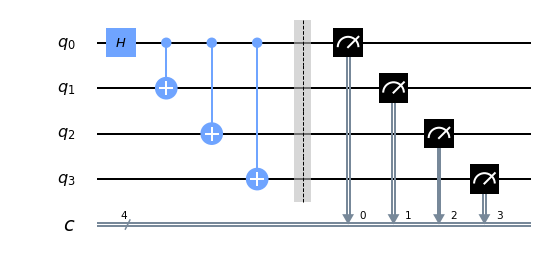

In [21]:
# Simpler code
ex1_qc = QuantumCircuit(q4,c4,name="first_m")
# Gates
ex1_qc.h(0)
for i in range(3):
    ex1_qc.cx(0,i+1)

# Measurement
ex1_qc.barrier()
for i in range(4):
    ex1_qc.measure(i,i)
ex1_qc.draw(output='mpl')

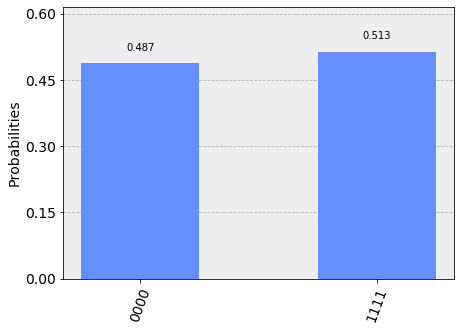

In [22]:
# Use Aer's qasm_simulator
backend_q = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is default.
job_ex1 = execute(ex1_qc, backend_q, shots=1024)
plot_histogram(job_ex1.result().get_counts(ex1_qc))

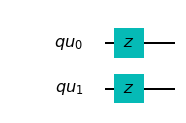

In [23]:
# Create a simple quantum register with 2 qubit 
# to examine unitary simulator
qu2 = QuantumRegister(2,'qu')
# Form a quantum circuit
# Note that the circuit name is optional
qu = QuantumCircuit(qu2,name="unitary_qc")
# Add a single qubit rotation
qu.z(0)
qu.z(1)
# Display the quantum circuit
qu.draw(output='mpl')

In [24]:
# Use Aer's unitary_simulator
backend_u = Aer.get_backend('unitary_simulator')

# Execute the circuit on the unitary simulator.
job_usim = execute(qu, backend_u)

In [25]:
# Grab the results from the job.
result_usim = job_usim.result()
result_usim

Result(backend_name='unitary_simulator', backend_version='0.3.2', date=datetime.datetime(2020, 2, 3, 16, 10, 0, 160755), header=Obj(backend_name='unitary_simulator', backend_version='0.3.2'), job_id='6b04c1da-95e1-4d5b-874e-901bfc66e5b3', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000256143}, qobj_id='18f933b9-b863-4e14-89c0-317890f20692', results=[ExperimentResult(data=ExperimentResultData(unitary=[[(1+0j), 0j, 0j, 0j], [0j, (-1+0j), 0j, 0j], [0j, 0j, (-1+0j), 0j], [0j, 0j, 0j, (1+0j)]]), header=Obj(clbit_labels=[], creg_sizes=[], memory_slots=0, n_qubits=2, name='unitary_qc', qreg_sizes=[['qu', 2]], qubit_labels=[['qu', 0], ['qu', 1]]), meas_level=2, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=4029736554, shots=1, status='DONE', success=True, time_taken=0.00010576200000000001)], status='COMPLETED', success=True, time_taken=0.0026330947875976562)

In [26]:
# Output the unitary matrix
unitary = result_usim.get_unitary(qu)
print('%s\n' % unitary)
# Check process fidelity
pf1=process_fidelity(Pauli(label='IX').to_matrix(), unitary)
pf2=process_fidelity(Pauli(label='ZZ').to_matrix(), unitary)
print('%s\n' % pf1)
print('%s\n' % pf2)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]

0j

(1+0j)



## Exercise 2
## a) Verify with 'Unitary Simulator' that the swap gate can be decomposed into three controlled-X gates:

<div>
<img src="img/swap_to_cnot.png" width="350"/>
</div>


## b) What about controlled-swap (Fredkin) gate? Verify with 'State Vector Simulator'.

<div>
<img src="img/fredkin.png" width="100"/>
</div>

In [27]:
from qiskit.quantum_info import process_fidelity

def compare_qc(qc_ref,qc_test):
    # Use Aer's unitary_simulator
    backend_u = Aer.get_backend('unitary_simulator')
    
    # Output the refernce unitary matrix
    u_ref = execute(qc_ref,backend_u).result().get_unitary(qc_ref)
    
    # Output the test unitary matrix
    u_test = execute(qc_test,backend_u).result().get_unitary(qc_test)
    
    return process_fidelity(u_ref,u_test)

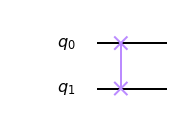

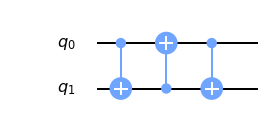

(1+0j)

In [28]:
# Create a reference circuit
swap_c_ref = QuantumCircuit(2)
swap_c_ref.swap(0,1)
display(swap_c_ref.draw(output='mpl'))

# Create a test circuit with 3 cnot gates instead of a swap gate
swap_c_test = QuantumCircuit(2)
swap_c_test.cx(0,1)
swap_c_test.cx(1,0)
swap_c_test.cx(0,1)
display(swap_c_test.draw(output='mpl'))


# Compare two unitaries
compare_qc(swap_c_ref,swap_c_test)

In [29]:
from qiskit.quantum_info import state_fidelity

def compare_sv(qc_ref,qc_test):
    # Use Aer's unitary_simulator
    backend_v = Aer.get_backend('statevector_simulator')
    
    # Output the refernce unitary matrix
    sv_ref = execute(qc_ref,backend_v).result().get_statevector(qc_ref,decimals=7)
    
    # Output the test unitary matrix
    sv_test = execute(qc_test,backend_v).result().get_statevector(qc_test,decimals=7)
    
    return state_fidelity(sv_ref,sv_test)

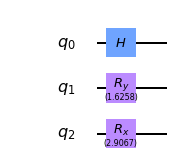

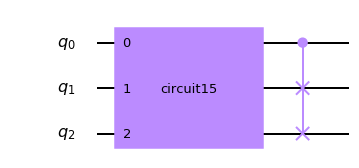

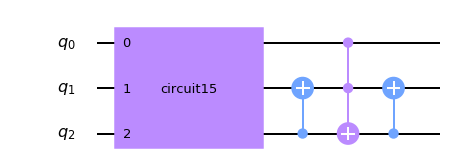

1.000000082671122

In [30]:
import random as r

# Apply a random 1-qubit rotation around x and y
ay = r.random()*np.pi
ax = r.random()*np.pi

# Create a circuit for preparing an initial state
swap_c_init = QuantumCircuit(3)
swap_c_init.h(0)
swap_c_init.ry(ay,1)
swap_c_init.rx(ax,2)
display(swap_c_init.draw(output='mpl'))

# Create a reference circuit
cswap_c_ref = QuantumCircuit(3)
cswap_c_ref.append(swap_c_init,[0,1,2])
cswap_c_ref.cswap(0,1,2)
display(cswap_c_ref.draw(output='mpl'))

# Create a test circuit with 3 cnot gates instead of a swap gate
cswap_c_test = QuantumCircuit(3)
cswap_c_test.append(swap_c_init,[0,1,2])
cswap_c_test.cx(2,1)
cswap_c_test.ccx(0,1,2)
cswap_c_test.cx(2,1)
display(cswap_c_test.draw(output='mpl'))

# Compare two states
compare_sv(cswap_c_ref,cswap_c_test)

# How to estimate an expectation value of an observable?

In [32]:
# Measure an expectation value of a Pauli observable
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
ZZ=np.kron(Z,Z)
XX=np.kron(X,X)

# Or use qiskit's built-in function to define Pauli matrices
ZI = Pauli(label='ZI').to_matrix()
XI = Pauli(label='XI').to_matrix()
YI = Pauli(label='YI').to_matrix()

## Exercise 3
## Create $\frac{|00\rangle+|11\rangle}{\sqrt{2}}$ and $\frac{|00\rangle-|11\rangle}{\sqrt{2}}$ and measure the expectation value of $Z\otimes Z$ and $X\otimes X$.

In [33]:
# Create some functions for measuring expectation values
# For pure states
def expectation_state(state, Operator):
    return np.dot(state.conj(), np.dot(Operator, state))
# For density matrices
def expectation_density(density, Operator):
    return np.trace(Operator @ density)

00+11 circuit:


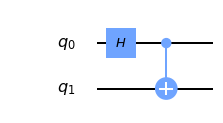

00-11 circuit:


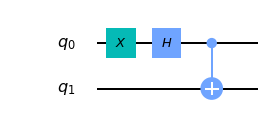

In [34]:
# We'll use statevector simulator, so no need to define classical registers
q2 = QuantumRegister(2,'q')
# Create a quantum circuit for 00 + 11 state
ex2_qc1 = QuantumCircuit(q2)
ex2_qc1.h(0)
ex2_qc1.cx(0,1)

# Create a quantum circuit for 00 - 11 state
ex2_qc2 = QuantumCircuit(q2)
ex2_qc2.x(0)
ex2_qc2.h(0)
ex2_qc2.cx(0,1)

print('00+11 circuit:')
display(ex2_qc1.draw(output='mpl'))
print('00-11 circuit:')
display(ex2_qc2.draw(output='mpl'))

In [35]:
# Use Aer's statevector_simulator
backend_sv = Aer.get_backend('statevector_simulator')

# Execute the first circuit on the statevector simulator.
job_ex2_1 = execute(ex2_qc1, backend_sv)
output1 = job_ex2_1.result().get_statevector(ex2_qc1, decimals=5)
# Execute the second circuit on the statevector simulator.
job_ex2_2 = execute(ex2_qc2, backend_sv)
output2 = job_ex2_2.result().get_statevector(ex2_qc2, decimals=5)

# Measure the expectation values
zz1 = expectation_state(output1,ZZ)
zz2 = expectation_state(output2,ZZ)
xx1 = expectation_state(output1,XX)
xx2 = expectation_state(output2,XX)
print('<ZZ> on circuit 1 = %s' % zz1)
print('<ZZ> on circuit 2 = %s' % zz2)
print('<XX> on circuit 1 = %s' % xx1)
print('<XX> on circuit 2 = %s' % xx2)

<ZZ> on circuit 1 = (1.0000091042+0j)
<ZZ> on circuit 2 = (1.0000091042+0j)
<XX> on circuit 1 = (1.0000091042+0j)
<XX> on circuit 2 = (-1.0000091042+0j)


# Running Quantum Circuits on IBM Q

![title](img/ibmq.jpeg)

## Retrieve IBM Quantum Device Information

![IBM QE](img/ibm_qe_2.png)

In [10]:
IBMQ.enable_account('168a8c034a04e976ce953d744be875833581f9416724197ba86a0ae88614ea5d209ae5fe15b7f582988fb170a2ba64165077ffaaabed9c908551cd5e0f966127')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
print(IBMQ.stored_account())
print(IBMQ.active_account())

{}
{'token': '168a8c034a04e976ce953d744be875833581f9416724197ba86a0ae88614ea5d209ae5fe15b7f582988fb170a2ba64165077ffaaabed9c908551cd5e0f966127', 'url': 'https://auth.quantum-computing.ibm.com/api'}


In [12]:
my_provider=IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [39]:
# Retrieve IBM Quantum device information
backend_overview()

ibmq_armonk                  ibmq_essex                   ibmq_burlington
-----------                  ----------                   ---------------
Num. Qubits:  1              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 2              Pending Jobs: 6
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      142.8          Avg. T1:      102.6          Avg. T1:      98.5
Avg. T2:      175.9          Avg. T2:      151.7          Avg. T2:      80.1



ibmq_london                  ibmq_ourense                 ibmq_vigo
-----------                  ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 2              Pending Jobs: 30             Pending Jobs: 2
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           O

In [21]:
# Retrieve a specific IBM Quantum device information
# ibmq_16_melbourne as an example
backend_mel = my_provider.get_backend('ibmq_16_melbourne')
backend_monitor(backend_mel)

ibmq_16_melbourne
Configuration
-------------
    n_qubits: 15
    operational: True
    status_msg: active
    pending_jobs: 21
    backend_version: 2.0.1
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    open_pulse: False
    n_registers: 1
    credits_required: True
    max_shots: 8192
    online_date: 2018-11-06T05:00:00+00:00
    backend_name: ibmq_16_melbourne
    sample_name: albatross
    memory: True
    conditional: False
    allow_q_object: True
    max_experiments: 75
    quantum_volume: None
    allow_q_circuit: False
    url: None
    coupling_map: [[0, 1], [0, 14], [1, 0], [1, 2], [1, 13], [2, 1], [2, 3], [2, 12], [3, 2], [3, 4], [3, 11], [4, 3], [4, 5], [4, 10], [5, 4], [5, 6], [5, 9], [6, 5], [6, 8], [7, 8], [8, 6], [8, 7], [8, 9], [9, 5], [9, 8], [9, 10], [10, 4], [10, 9], [10, 11], [11, 3], [11, 10], [11, 12], [12, 2], [12, 11], [12, 13], [13, 1], [13, 12], [13, 14], [14, 0], [14, 13]]
    allow_object_storage: True
    descrip

In [43]:
# Let's look at one more example
backend_qx2 = my_provider.get_backend('ibmqx2')
backend_monitor(backend_qx2)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 7
    backend_version: 2.0.5
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    online_date: 2017-01-24T05:00:00+00:00
    sample_name: sparrow
    memory: True
    coupling_map: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]
    allow_q_object: True
    max_experiments: 75
    n_registers: 1
    allow_object_storage: True
    max_shots: 8192
    description: 5 qubit device
    allow_q_circuit: False
    credits_required: True
    backend_name: ibmqx2
    open_pulse: False
    conditional: False
    url: None
    quantum_volume: 8

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.28605 GHz / 58.96616 µs / 66.33084 µs / 0.0 / 0.00062 / 0.00125 / 0.0175
    Q1 / 5.238 GHz / 59.21443 µ

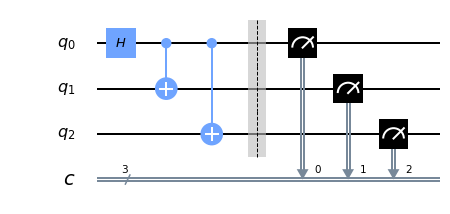

In [44]:
# Create a 3-qubit GHZ state
ghz3_q = QuantumRegister(3,'q')
ghz3_c = ClassicalRegister(3,'c')
ghz3= QuantumCircuit(ghz3_q,ghz3_c)

ghz3.h(0)
ghz3.cx(0,1)
ghz3.cx(0,2)
ghz3.barrier()
for i in range(3):
    ghz3.measure(i,i)

ghz3.draw(output='mpl')

## Now, let's run circuits with real IBMQ devices

In [45]:
# Define backend as one of the real devices (5-qubit systems for now)
backend_vigo = my_provider.get_backend('ibmq_vigo')
backend_es = my_provider.get_backend('ibmq_essex')
backend_ou = my_provider.get_backend('ibmq_ourense')

In [39]:
# Run 3-qubit GHZ experiment on a 5-qubit device (try vigo)
job_exp = execute(ghz3, backend=backend_vigo)
job_monitor(job_exp)

Job Status: job has successfully run


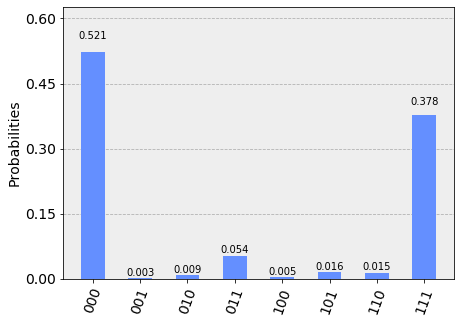

In [41]:
# Grab experimental results
result_vigo = job_exp.result()
counts_vigo = result_vigo.get_counts(ghz3)
plot_histogram(counts_vigo)

In [42]:
# Finally, run the same experiment on the 14-qubit device.
job_exp2 = execute(ghz3, backend=backend_mel)
job_monitor(job_exp2)

Job Status: job has successfully run


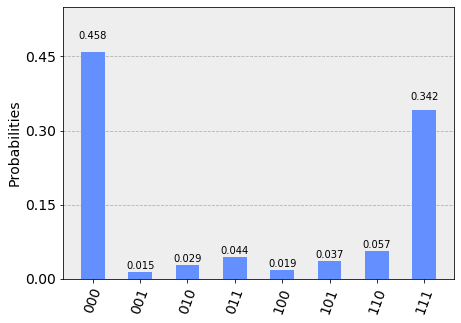

In [45]:
# Grab experimental results
result_mel = job_exp2.result()
counts_mel = result_mel.get_counts(ghz3)
plot_histogram(counts_mel)

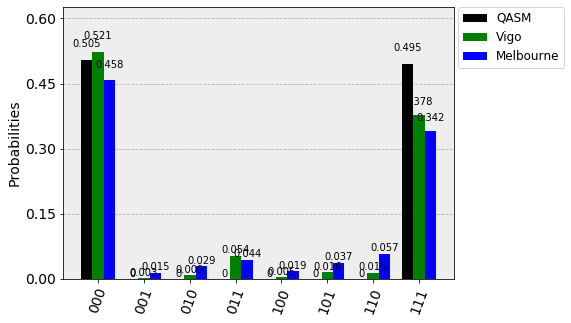

In [46]:
# Now, compare to theory by running it on qasm_simulator
job_qasm = execute(ghz3,backend=backend_q)
result_qasm = job_qasm.result()
counts_qasm = result_qasm.get_counts(ghz3)
# Plot both experimental and ideal results
plot_histogram([counts_qasm,counts_vigo,counts_mel],
               color=['black','green','blue'],
               legend=['QASM','Vigo','Melbourne'])

# Qiskit gates summary: 
## <a href="https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/fundamentals/7_summary_of_quantum_operations.ipynb" target="_blank"> https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/fundamentals/7_summary_of_quantum_operations.ipynb</a>

# Native gates of IBM Q devices

One way to write a general form of a single qubit unitary:
<br>
<br>
$$
U(\theta,\phi,\lambda)=\begin{bmatrix} 
 \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2) 
\end{bmatrix}
$$
***
Native single qubit gates:
* `u3`=$U(\theta,\phi,\lambda)$
* `u2`=$U(\pi/2,\phi,\lambda)$
* `u1`=$U(0,0,\lambda)$

Native two qubit gate:
* controlled-NOT

### But why such form? $\rightarrow$ This is related to gate implementations on real devices

### Note that $$
U(\theta,\phi,\lambda)=\begin{bmatrix} 
 \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2) 
\end{bmatrix}
$$ 
### can be written as:
### \begin{align}
U(\theta,\phi,\lambda)&=R_z(\phi)R_y(\theta)R_z(\lambda)\\
&=R_z(\phi)R_x(-\pi/2)R_z(\theta)R_x(\pi/2)R_z(\lambda)
\end{align}

### In RF/MW based quantum control, $R_z$ is given for free, and $R_x(\pm\pi/2)$ can be calibrated with high precision.

## Exercise 3: 
## Quantum Teleportation


![quantum teleportation](img/qt_circuit.png)

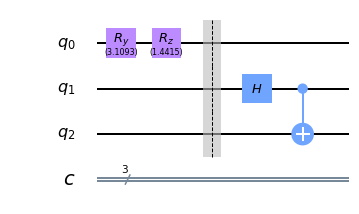

In [46]:
import random as r

# Define a 3-qubit circuit with 3 classical registers
qtel = QuantumCircuit(3,3)

# Apply a random 1-qubit rotation around y
a1 = r.random()*np.pi
a2 = r.random()*np.pi

qtel.ry(a1,0)
qtel.rz(a2,0)

qtel.barrier()
qtel.draw(output='mpl')

# Prepare a 2-qubit bell state
qtel.h(1)
qtel.cx(1,2)

qtel.draw(output='mpl')

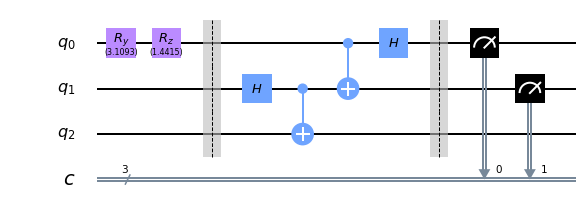

In [47]:
# Apply bell measurement on qubit 0 and 1
qtel.cx(0,1)
qtel.h(0)
qtel.barrier()
qtel.measure([0, 1],[0, 1])

qtel.draw(output='mpl')

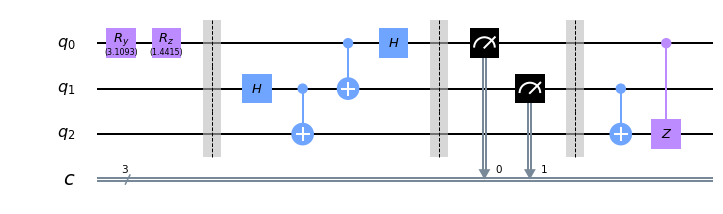

In [48]:
# Apply controlled gates to complete the teleportation
qtel.barrier()
qtel.cx(1,2)
qtel.cz(0,2)

qtel.draw(output='mpl')

Quantum teleportation circuit:


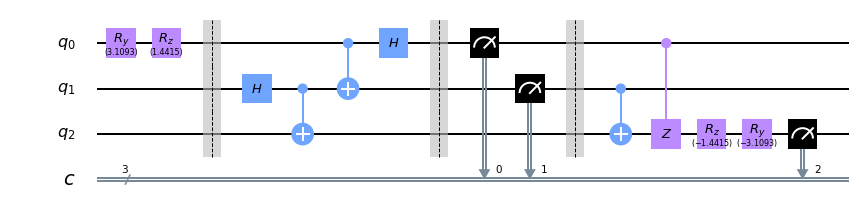

In [49]:
# Check the answer by applying the inverse unitary
qtel.rz(-a2,2)
qtel.ry(-a1,2)

qtel.measure(2,2)
print('Quantum teleportation circuit:')
qtel.draw(output='mpl')

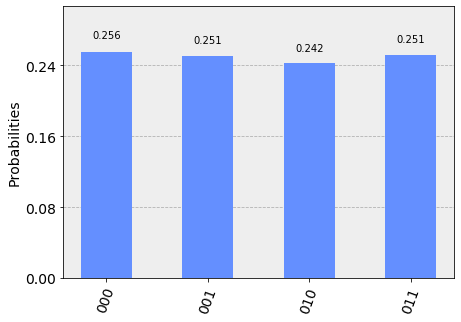

{'010': 2423, '000': 2556, '001': 2508, '011': 2513}


In [50]:
# n is the number of shots
n=10000
job_qtel = execute(qtel, backend_q, shots=n)
display(plot_histogram(job_qtel.result().get_counts(qtel)))
qtel_c = job_qtel.result().get_counts(qtel)
print(qtel_c)

## Parameterized Circuits

* Can be very useful for building __variational quantum circuits__

![vqa1](img/vqa1.png)
![vqa2](img/vqa2.png)

## Binding parameters to values

* All circuit parameters must be bound before sending the circuit to a backend.
* The `bind_parameters` method accepts a dictionary mapping Parameters to values, and returns a new circuit with each parameter replaced by its corresponding value.
* `qiskit.execute` now accepts a `parameter_binds` keyword argument which, when specified as a list of dictionaries mapping Parameters to values, will bind and execute a circuit on the backend for every mapping dictionary in the list.

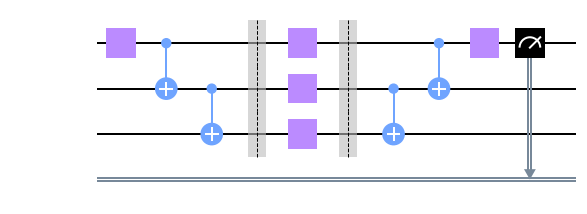

In [171]:
# Simple example
from qiskit.circuit import Parameter

# Define two parameters, t1 and t2
theta1 = Parameter('t1')
theta2 = Parameter('t2')

# Build a 5-qubit circuit
qc = QuantumCircuit(3, 1)

# First parameter, t1, is used for a single qubit rotation of a controlled qubit
qc.ry(theta1,0)
for i in range(2):
    qc.cx(i, i+1)
qc.barrier()
# Second parameter, t2, is used here
qc.rz(theta2,range(3))
qc.barrier()

for i in reversed(range(2)):
    qc.cx(i, i+1)
    
qc.ry(theta1,0)
qc.measure(0, 0)

qc.draw(output='mpl')

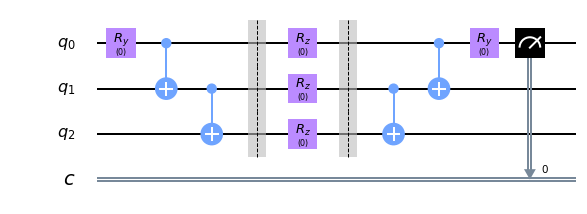

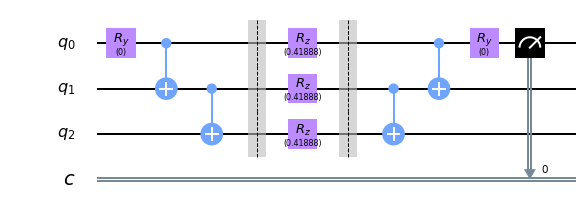

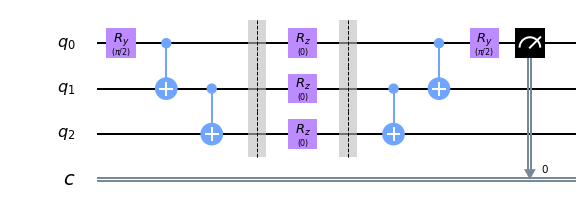

In [52]:
theta1_range = np.linspace(0, np.pi/2, 2)
theta2_range = np.linspace(0, 2 * np.pi, 16)

circuits = [qc.bind_parameters({theta1: theta_val1, theta2: theta_val2})
            for theta_val1 in theta1_range for theta_val2 in theta2_range ]

# Visualize several circuits to check that correct circuits are generated correctly.
display(circuits[0].draw(output='mpl'))
display(circuits[1].draw(output='mpl'))
display(circuits[16].draw(output='mpl'))

In [53]:
# Execute multiple circuits
job = execute(qc, backend=Aer.get_backend('qasm_simulator'),
              parameter_binds=[{theta1: theta_val1, theta2: theta_val2} 
                               for theta_val1 in theta1_range for theta_val2 in theta2_range])

# Store all counts
counts = [job.result().get_counts(i) for i in range(len(job.result().results))]

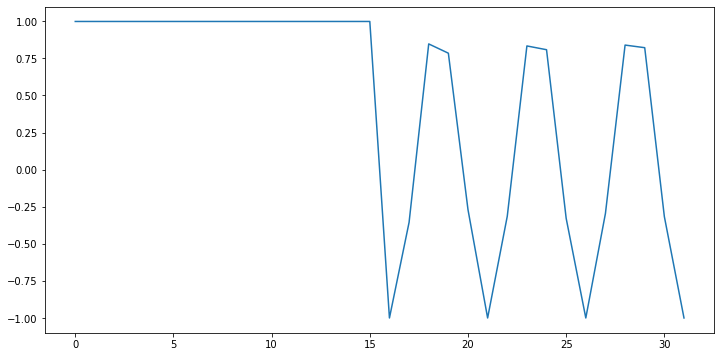

In [54]:
# Plot to visualize the result
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts: (counts.get('0',0)-counts.get('1',1))/1024,counts)))
plt.show()

# Eigenvalue Measurement

### If an eigenvalue of a unitary matrix is +1 or -1, it can be measured by the following circuit:

<br> </br>
<div>
<img src="img/eigen_measure.png" width="500"/>
</div>
<br> </br>

## Exercise 4

## a) Design quantum circuits to measure eigenvalues of $Z\otimes Z\otimes I$ on $\frac{\alpha|000\rangle +\beta|111\rangle}{2}$ and $\frac{\alpha|010\rangle +\beta|101\rangle}{2}$.

## b) Design quantum circuits to measure eigenvalues of $X\otimes X\otimes I$ on $\frac{\alpha|+++\rangle +\beta|---\rangle}{2}$ and $\frac{\alpha|+-+\rangle +\beta|-+-\rangle}{2}$.



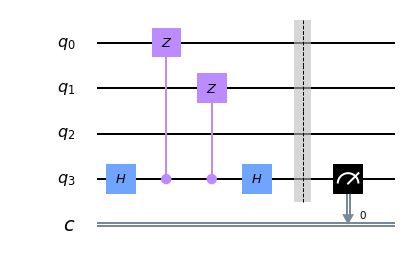

In [55]:
# Exercise 4. a)
# Create the measurement circuit
m_ZZI = QuantumCircuit(4,1)
m_ZZI.h(3)
m_ZZI.cz(3,0)
m_ZZI.cz(3,1)
m_ZZI.h(3)
m_ZZI.barrier()
m_ZZI.measure(3,0)
m_ZZI.draw(output='mpl')
#
#m_ZIZ = QuantumCircuit(4,1)
#m_ZIZ.h(3)
#m_ZIZ.cz(3,0)
#m_ZIZ.cz(3,2)
#m_ZIZ.h(3)
#m_ZIZ.barrier()
#m_ZIZ.measure(3,0)
#display(m_ZIZ.draw(output='mpl'))

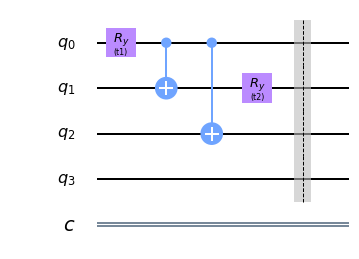

In [56]:
# Exercise 4. a)
# Create the state preparation circuit for a|000> + b|111> and a|010> + b|101> 
# for various values of a & b
from qiskit.circuit import Parameter

# Define parameter t1 and t2
theta1 = Parameter('t1')
theta2 = Parameter('t2')

qs_a = QuantumCircuit(4,1)
qs_a.ry(theta1,0)
qs_a.cx(0,1)
qs_a.cx(0,2)
qs_a.ry(theta2,1)
qs_a.barrier()
display(qs_a.draw(output='mpl'))

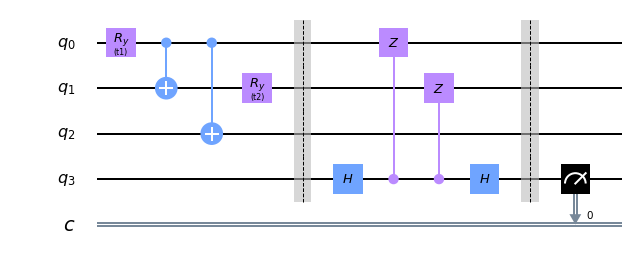

In [57]:
# Add state prep. and measurement circuits
qc_ZZI = qs_a+m_ZZI
qc_ZZI.draw(output='mpl')

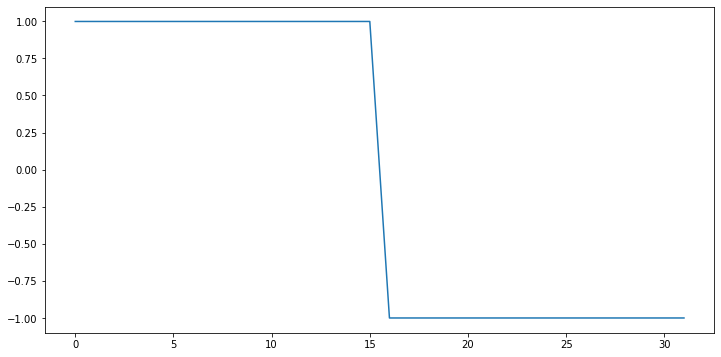

In [58]:
theta1_range = np.linspace(0, np.pi, 16)
theta2_range = np.linspace(0, np.pi, 2)

# Bind parameters and create multiple circuits
# Test for various a & b for a|000> + b|111> first, 
# then vary the amplitudes for a|010> + b|101> :
# Fix theta2 first, and vary theta1: 
circuits_ZZI = [qc_ZZI.bind_parameters({theta1: theta_val1, theta2: theta_val2})
            for theta_val2 in theta2_range for theta_val1 in theta1_range ]

# Execute multiple circuits
job_ZZI = execute(circuits_ZZI, backend=Aer.get_backend('qasm_simulator'))

# Store all counts
counts_ZZI = [job_ZZI.result().get_counts(i) for i in range(len(job_ZZI.result().results))]

In [ ]:
# Plot to visualize the result
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts_ZZI: (counts_ZZI.get('0',0)-counts_ZZI.get('1',1))/1024, counts_ZZI)))
plt.show()

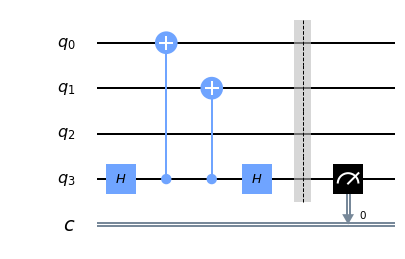

In [59]:
# Exercise 4. b)
# Create the measurement circuit
m_XXI = QuantumCircuit(4,1)
m_XXI.h(3)
m_XXI.cx(3,0)
m_XXI.cx(3,1)
m_XXI.h(3)
m_XXI.barrier()
m_XXI.measure(3,0)
m_XXI.draw(output='mpl')
#
#m_XIX = QuantumCircuit(4,1)
#m_XIX.h(3)
#m_XIX.cx(3,0)
#m_XIX.cx(3,2)
#m_XIX.h(3)
#m_XIX.barrier()
#m_XIX.measure(3,0)
#display(m_XIX.draw(output='mpl'))

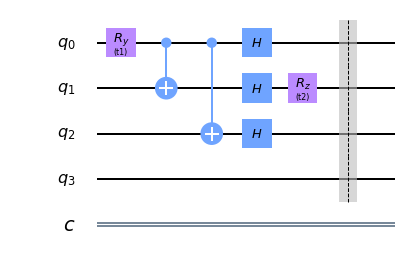

In [60]:
# Exercise 4. b)
# Create the state preparation circuit for a|+++> + b|---> and a|+-+> + b|-+-> 
# for various values of a & b
qs_b = QuantumCircuit(4,1)
qs_b.ry(theta1,0)
qs_b.cx(0,1)
qs_b.cx(0,2)
for i in range(3):
    qs_b.h(i)
# To flip |+> to |->, we need a phase flip gate
qs_b.rz(theta2,1)
qs_b.barrier()
display(qs_b.draw(output='mpl'))

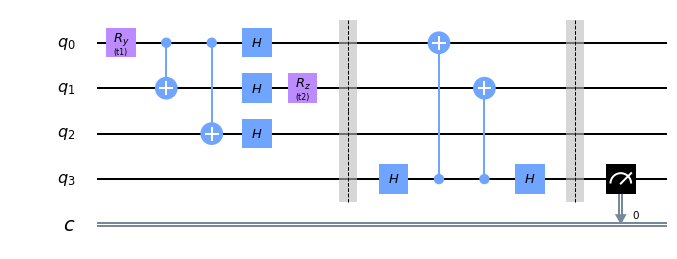

In [61]:
# Add state prep. and measurement circuits
qc_XXI = qs_b+m_XXI
qc_XXI.draw(output='mpl')

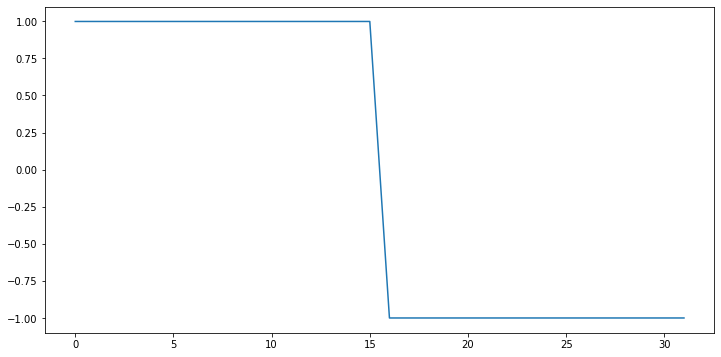

In [62]:
# Bind parameters and create multiple circuits
# Test for various a & b for a|000> + b|111> first, 
# then vary the amplitudes for a|010> + b|101> :
# Fix theta2 first, and vary theta1: 
circuits_XXI = [qc_XXI.bind_parameters({theta1: theta_val1, theta2: theta_val2})
            for theta_val2 in theta2_range for theta_val1 in theta1_range ]

# Execute multiple circuits
job_XXI = execute(circuits_XXI, backend=Aer.get_backend('qasm_simulator'))

# Store all counts
counts_XXI = [job_XXI.result().get_counts(i) for i in range(len(job_XXI.result().results))]

# Plot to visualize the result
plt.figure(figsize=(12,6))
plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts_XXI: (counts_XXI.get('0',0)-counts_XXI.get('1',1))/1024, counts_XXI)))
plt.show()

# Customize initial state

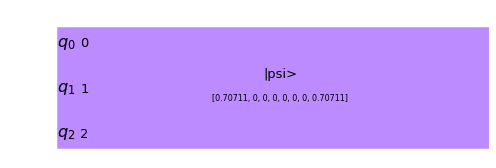

In [63]:
# Create a quantum register with 3 qubits
q = QuantumRegister(3,'q')
# Form a quantum circuit
qent = QuantumCircuit(q)
qent.initialize([1, 0, 0, 0, 0, 0, 0, 1] / np.sqrt(2), [q[0], q[1], q[2]])
# Display the quantum circuit
qent.draw(output='mpl')

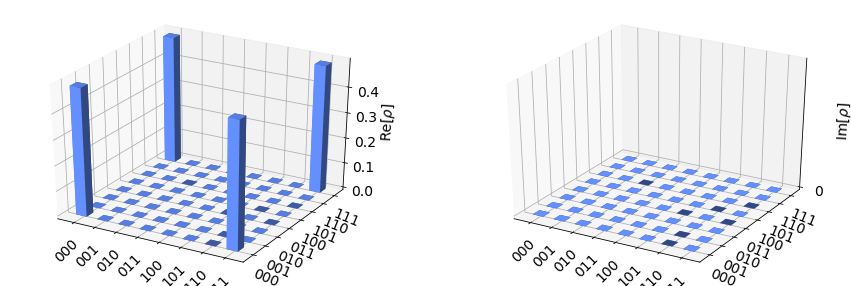

In [64]:
# Use Aer's state vector simulator
backend_sv = Aer.get_backend('statevector_simulator')

# Execute and plot output state
output_ent = execute(qent, backend_sv).result().get_statevector(0, decimals=3)
plot_state_city(output_ent)

## Build a sub-circuit as a sub-routine in many circuits

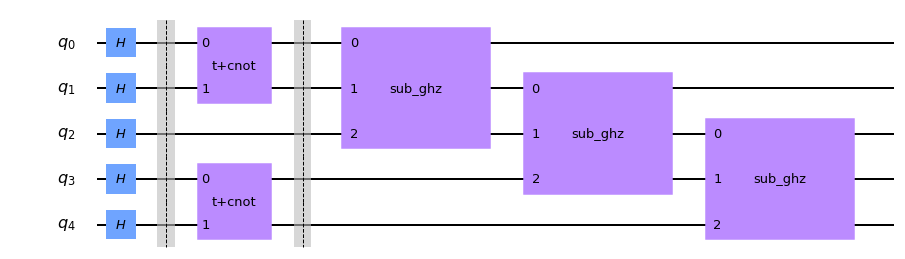

In [65]:
# Build a sub-circuit
# sub_ghz(n,c,t) creates a quantum circuit for creating an n-qubit GHZ state.
# n is the total number of qubits, c is an index for a control qubit, t is a vector of indices for target qubits.
def sub_ghz(n,c,t):
    sub_q = QuantumRegister(n)
    sub_circ = QuantumCircuit(sub_q, name='sub_ghz')
    sub_circ.h(c)
    for i in t:
        sub_circ.cx(c,i)
    return sub_circ

# Create a sub-circuit for 3-qubit GHZ state prep.
sub_ghz3 = sub_ghz(3,0,[1,2])
sub_inst3 = sub_ghz3.to_instruction()

# Create a sub-circuit consisting of T gate and cnot.
sub_tcnot = QuantumCircuit(QuantumRegister(2),name='t+cnot')
sub_tcnot.t(0)
sub_tcnot.cx(0,1)

q = QuantumRegister(5, 'q')
circ = QuantumCircuit(q)

# Now create a quantum circuit using sub-circuits.
# Apply Hadamard on all gates.
for i in range(5):
    circ.h(i)
#
circ.barrier()
# Appy 2-qubit GHZ preparation on qubits 0 and 1, and on qubits 3 and 4.
circ.append(sub_tcnot, [q[0],q[1]])
circ.append(sub_tcnot, [q[3], q[4]])
#    
circ.barrier()
# Apply 3-qubit GHZ preparation on all 3 neighbouring qubits.
for i in range(3):
    circ.append(sub_inst3, [q[i], q[i+1],q[i+2]])
circ.draw(output='mpl')

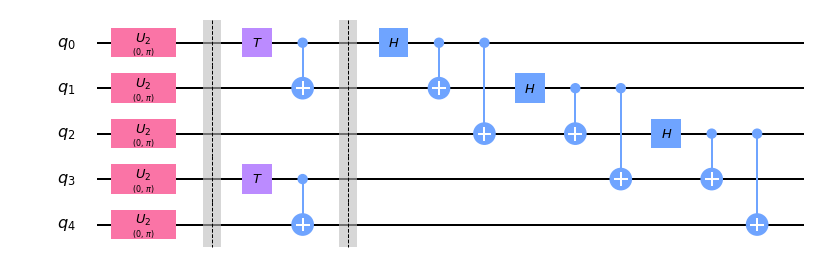

In [66]:
# We can also decompose the circuit that is constructed using sub-circuits.
circ.decompose().draw(output='mpl')

## Useful non-Unitary operations: Reset & Conditioning on classical bits

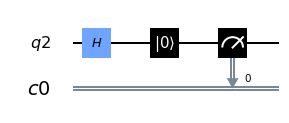

{'0': 1024}

In [67]:
# Reset operation forces the target qubit to go to |0>
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(0)

qc.measure(q, c)
display(qc.draw(output='mpl'))

# Test the result
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=1024)
job.result().get_counts(qc)

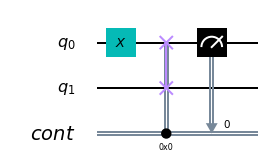

{'0': 1024}


In [68]:
# Controlled qubit operation, controlled by classical bits
# This could be useful for designing a post-selection scheme of a quantum algorithm
q2 = QuantumRegister(2,'q')
cont = ClassicalRegister(1,'cont')
qc = QuantumCircuit(q2,cont)
qc.x(0)

# Swap qubits 1 and 2 if the classical bit is 0
qc.swap(0,1).c_if(cont, 0)
qc.measure(0,cont)
display(qc.draw(output='mpl'))

job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=1024)
print(job.result().get_counts(qc))

![part3](img/part3_v2.png)

### > Introducing Quantum Information Science Kit (qiskit)
### > Quantum Circuits I
### > Quantum Circuits II
### > Transpilation

## Limitations of Current Quantum Devices

- Noisy qubits: Total runtime must be much less than T1 and T2 (in the orde of 10-100 $\mu$s)
- Noisy gates

__$\rightarrow$ Circuit depth must be as shallow as possible__

__Let's look at the 20 qubit IBM quantum device:__
<div>
<img src="img/ibm_tokyo.png" width="100"/>
</div>

- Arbitrary gates must be decomposed into the native (basis) gate set

- Limited qubit connectivity for entangling gates.
    - In general, `swap` gates (~ 3 `cnot`) are used to complete the connectivity
<div>
<img src="img/swap_to_cnot.png" width="300"/>
</div>

__$\rightarrow$ Increases the circuit depth__

### Must rewrite circuits (transpile) for device topology, and to minimize depth 

### Transpiler is qiskit's circuit-rewriting framework

### Note: compiler would correspond to a larger translation from circuits to the level of machine pulses.

In [2]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager, Layout
from qiskit.tools.visualization import plot_gate_map

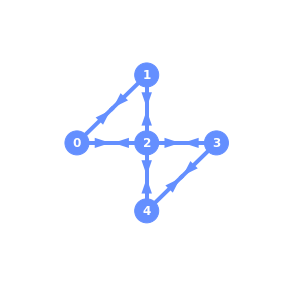

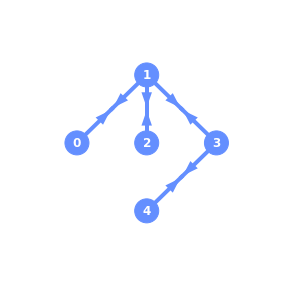

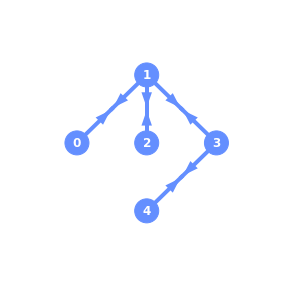

In [80]:
# Let's take a look at the layout of physical devices with the gate directions
display(plot_gate_map(backend_qx2,plot_directed=True))
display(plot_gate_map(my_provider.get_backend('ibmq_burlington'),plot_directed=True))
display(plot_gate_map(my_provider.get_backend('ibmq_london'),plot_directed=True))

## When `transpile` is called, a number of things occur by default:

1. Map desired circuit to a physical device layout
2. Unroll gates to the basis gate set
3. Measurement barrier
4. Swap mapping for qubit connectivity
5. Decompose swap
6. CNOT direction & CNOT cancellation
7. Single-qubit gate optimization

### Let's do a simple demo

Original circuit


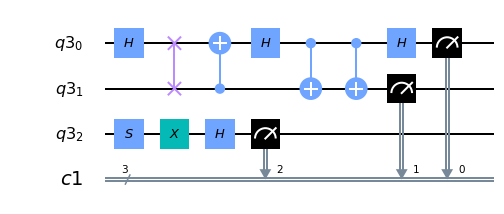

Transpiled circuit for ibmqx2


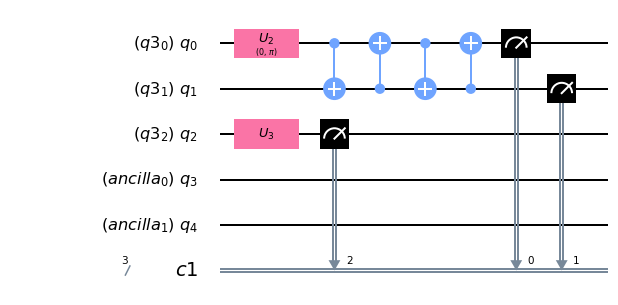

Transpiled circuit for ibmqx_Burlington


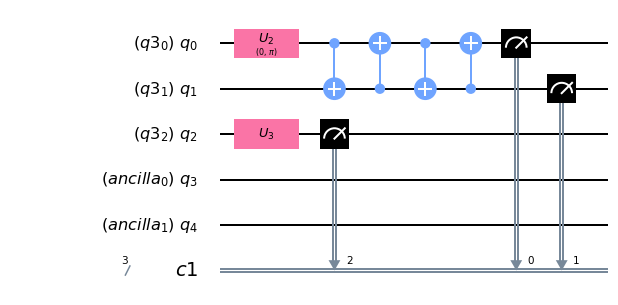

In [81]:
# Create a dummy circuit for default transpiler demonstration
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)
qc.h(0)
qc.swap(0,1)
qc.cx(1,0)
qc.s(2)
qc.x(2)
qc.h(2)
qc.measure(qr[2],cr[2])
qc.h(0)
qc.cx(0,1)
qc.cx(0,1)
qc.h(0)
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
print('Original circuit')
display(qc.draw(output='mpl'))

# Transpile the circuit to run on ibmqx2
qt_qx4 = transpile(qc,backend_qx2)
print('Transpiled circuit for ibmqx2')
display(qt_qx4.draw(output='mpl'))

# Transpile the circuit to run on ibmq_burlington
qt_ou = transpile(qc,my_provider.get_backend('ibmq_burlington'))
print('Transpiled circuit for ibmqx_Burlington')
display(qt_ou.draw(output='mpl'))

## Pick the right physical qubits

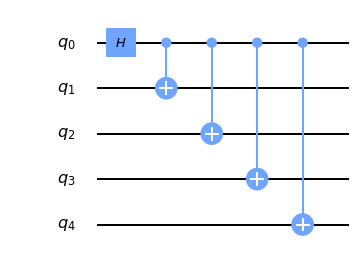

In [90]:
qr = QuantumRegister(5,'q')
qc = QuantumCircuit(qr)
qc.h(0)
for i in range(4):
    qc.cx(0,i+1)
qc.draw(output='mpl')

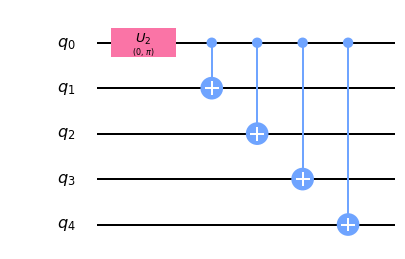

Number of operations = 5
Circuit depth = 5
Number of qubits = 5
Operations: OrderedDict([('cx', 4), ('u2', 1)])
Number of unentangled subcircuits = 1


In [91]:
qc_t = transpile(qc, basis_gates=['u1','u2','u3','cx'])
# Display transpiled circuit
display(qc_t.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_t.size())
# Circuit depth
print("Circuit depth = %s" % qc_t.depth())
# Number of qubits
print("Number of qubits = %s" % qc_t.width())
# Breakdown of operations by type
print("Operations: %s" % qc_t.count_ops())
# Number of unentangled subcircuits in this circuit.
# In principle, each subcircuit can be executed on a different quantum device.
print("Number of unentangled subcircuits = %s" % qc_t.num_tensor_factors())

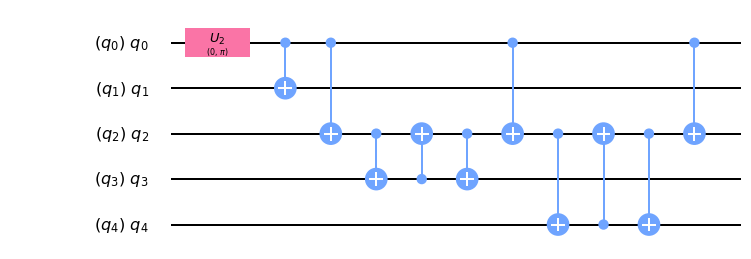

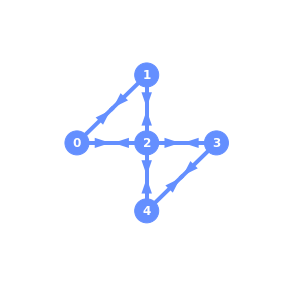

Number of operations = 11
Circuit depth = 11


In [92]:
# Map it onto 5 qubit backend ibmqx2
qc_qx2 = transpile(qc, backend_qx2, basis_gates=['u1','u2','u3','cx'])
display(qc_qx2.draw(output='mpl'))
display(plot_gate_map(backend_qx2,plot_directed=True))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_qx2.size())
# Circuit depth
print("Circuit depth = %s" % qc_qx2.depth())

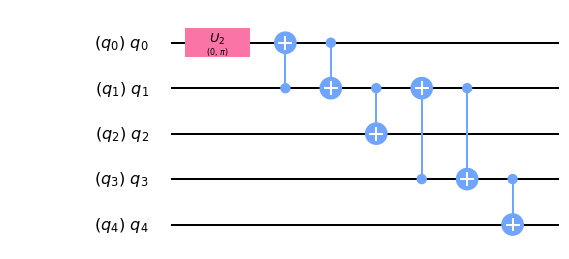

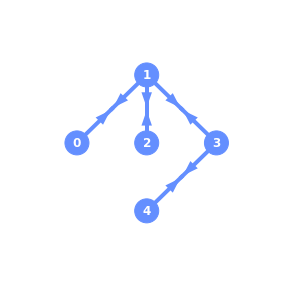

Number of operations = 7
Circuit depth = 7


In [93]:
# Map it onto 5 qubit backend ibmq_vigo
qc_vigo = transpile(qc, backend_vigo,basis_gates=['u1','u2','u3','cx'])
display(qc_vigo.draw(output='mpl'))
display(plot_gate_map(backend_vigo,plot_directed=True))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_vigo.size())
# Circuit depth
print("Circuit depth = %s" % qc_vigo.depth())

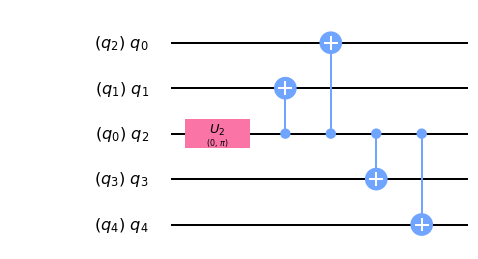

Number of operations = 5
Circuit depth = 5


In [95]:
# Customize the layout
layout = Layout({qr[0]: 2, qr[1]: 1, qr[2]: 0, qr[3]:3, qr[4]:4})
# Map it onto 5 qubit backend ibmqx2
qc_qx2_new = transpile(qc, backend_qx2, initial_layout=layout,basis_gates=['u1','u2','u3','cx'])
display(qc_qx2_new.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_qx2_new.size())
# Circuit depth
print("Circuit depth = %s" % qc_qx2_new.depth())

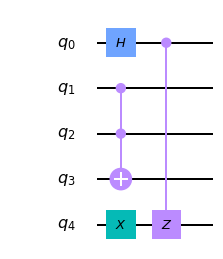

Decompose in terms of a one and two qubit universal gate set


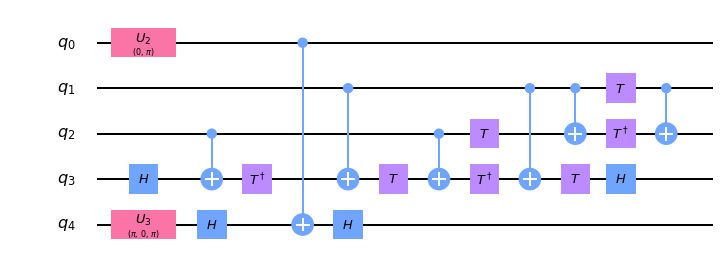

In [147]:
# Test transpilation with a 5-qubit circuit including a Toffoli gate
qr = QuantumRegister(5,'q')
qccx = QuantumCircuit(qr)
qccx.h(0)
qccx.ccx(1,2,3)
qccx.x(4)
qccx.cz(0,4)
display(qccx.draw(output='mpl'))
print('Decompose in terms of a one and two qubit universal gate set')
display(qccx.decompose().draw(output='mpl'))

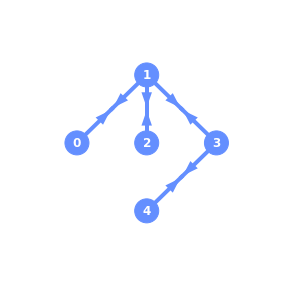

ibmq_vigo
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 1
    backend_version: 1.0.2
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    online_date: 2019-07-03T04:00:00+00:00
    sample_name: Giraffe
    memory: True
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    allow_q_object: True
    max_experiments: 75
    n_registers: 1
    allow_object_storage: True
    max_shots: 8192
    description: 5 qubit device Vigo
    allow_q_circuit: False
    credits_required: True
    backend_name: ibmq_vigo
    open_pulse: False
    conditional: False
    url: None
    quantum_volume: 16

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 4.79594 GHz / 54.16341 µs / 16.80549 µs / 0.0 / 0.00044 / 0.00088 / 0.031
    Q1 / 4.94005 GHz / 78.56075 µs / 88.32187 µs / 0

In [149]:
# Check device properties.
# The device information such as gate error and T1 and T2 also should be considered
# when picking a device for a given quantum circuit.
display(plot_gate_map(my_provider.get_backend('ibmq_vigo'),plot_directed=True))
backend_monitor(my_provider.get_backend('ibmq_vigo'))

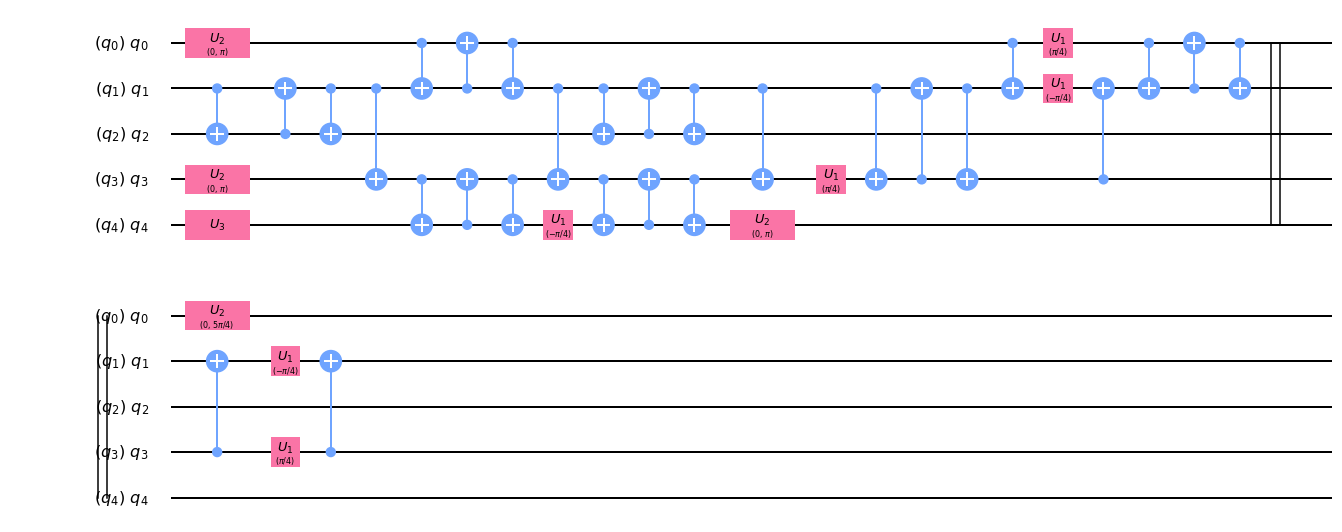

Circuit complexity when transpiled without layout change:
Number of operations = 39
Circuit depth = 25
Number of cx operations = 28


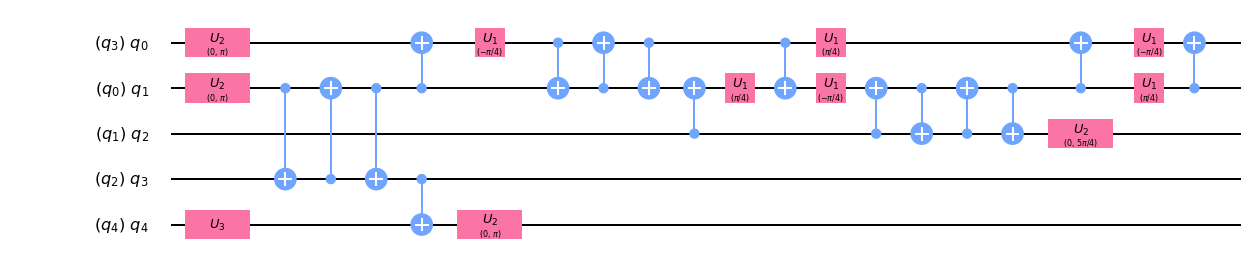

Circuit complexity when transpiled with layout change:
Number of operations = 27
Circuit depth = 20
Number of cx operations = 16


In [150]:
# Customize the layout 5 qubit backend ibmq_vigo
layout = Layout({qr[0]: 1, qr[1]: 2, qr[2]: 3, qr[3]:0, qr[4]:4})

# Map it onto 5 qubit backend ibmq_vigo without changing the layout
qccx_vigo_naive = transpile(qccx, backend_vigo,basis_gates=['u1','u2','u3','cx'])

# Map it onto 5 qubit backend ibmq_vigo with the above layout
qccx_vigo_layout = transpile(qccx, backend_vigo, initial_layout=layout,basis_gates=['u1','u2','u3','cx'])

display(qccx_vigo_naive.draw(output='mpl'))
# Print out some circuit properties for the circuit without layout change
print("Circuit complexity when transpiled without layout change:")
print("Number of operations = %s" % qccx_vigo_naive.size())
print("Circuit depth = %s" % qccx_vigo_naive.depth())
print("Number of cx operations = %s" % qccx_vigo_naive.count_ops()['cx'])

display(qccx_vigo_layout.draw(output='mpl'))
# Print out some circuit properties for the circuit with layout change
print("Circuit complexity when transpiled with layout change:")
print("Number of operations = %s" % qccx_vigo_layout.size())
print("Circuit depth = %s" % qccx_vigo_layout.depth())
print("Number of cx operations = %s" % qccx_vigo_layout.count_ops()['cx'])

## Minimize `Swap`

### Strategy: Find the best circuit stochastically

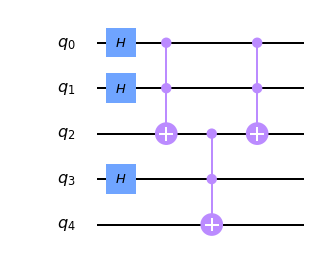

Number of operations = 6
Operation counts = OrderedDict([('h', 3), ('ccx', 3)])
Circuit depth = 4


In [28]:
# Apply 4-qubit controlled x gate
qr = QuantumRegister(5,'q')
c4z = QuantumCircuit(qr)

c4z.h(0)
c4z.h(1)
c4z.h(3)

c4z.ccx(0,1,2)
c4z.ccx(2,3,4)
c4z.ccx(0,1,2)
    
display(c4z.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % c4z.size())
# Count different types of operations
print("Operation counts = %s" % c4z.count_ops())
# Circuit depth
print("Circuit depth = %s" % c4z.depth())

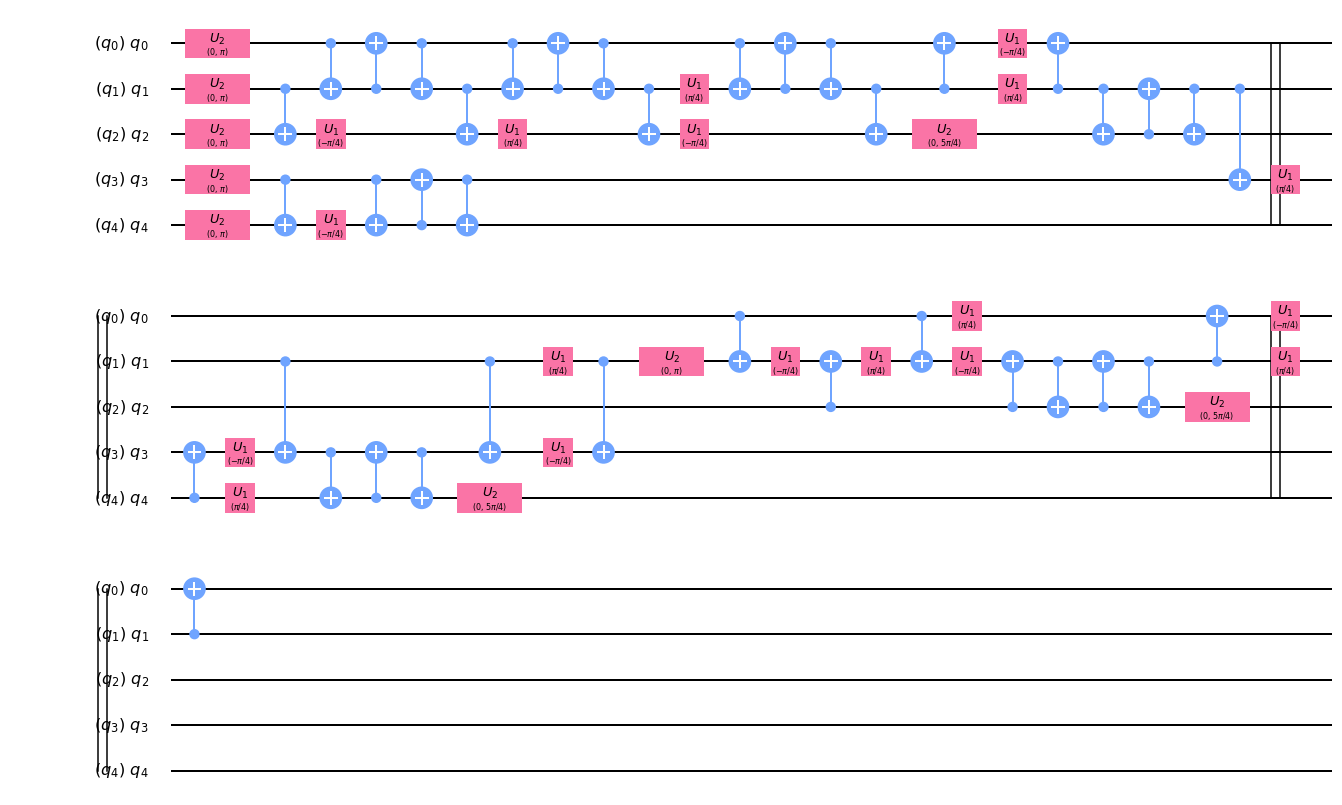

Number of operations = 66
Operation counts = OrderedDict([('cx', 39), ('u1', 18), ('u2', 9)])
Circuit depth = 46


In [30]:
backend_london = my_provider.get_backend('ibmq_london')
c4z_t = transpile(c4z, backend_london)
display(c4z_t.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % c4z_t.size())
# Count different types of operations
print("Operation counts = %s" % c4z_t.count_ops())
# Circuit depth
print("Circuit depth = %s" % c4z_t.depth())

In [31]:
# Transpile many times (100 times in this example) and pick the best one
# Use ibmq_london for example
tcircs0 = transpile([c4z]*20, backend_london,optimization_level=0)
tcircs1 = transpile([c4z]*20, backend_london,optimization_level=1)
tcircs2 = transpile([c4z]*20, backend_london,optimization_level=2)
tcircs3 = transpile([c4z]*20, backend_london,optimization_level=3)

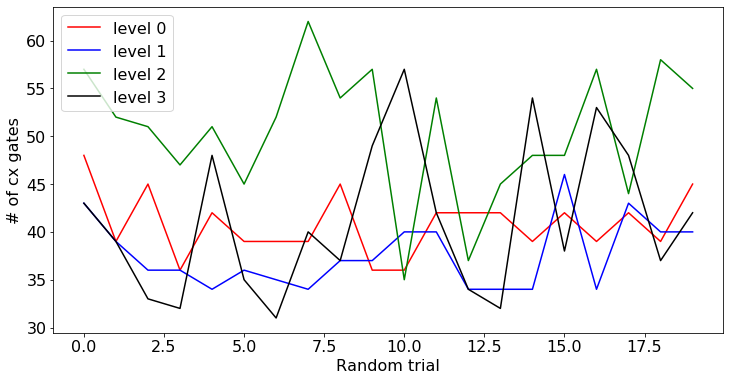

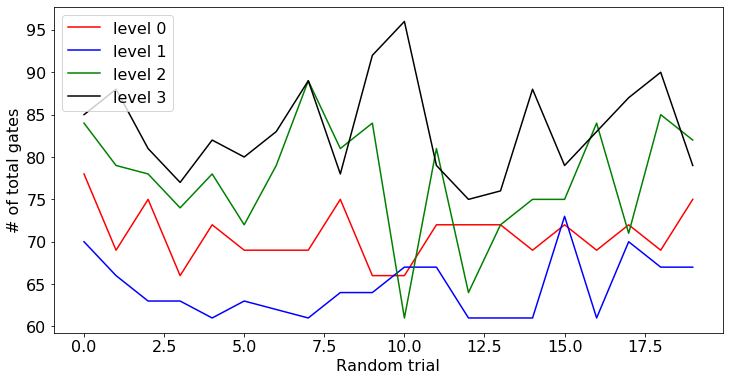

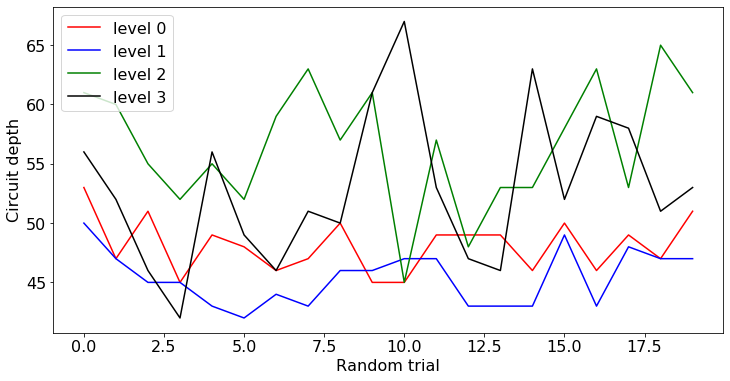

Opt0: Minimum # of cx gates = 36
Opt0: The best circuit is the circut 3
Opt1: Minimum # of cx gates = 34
Opt1: The best circuit is the circut 4
Opt2: Minimum # of cx gates = 35
Opt2: The best circuit is the circut 10
Opt3: Minimum # of cx gates = 31
Opt3: The best circuit is the circut 6


In [32]:
import matplotlib.pyplot as plt

num_cx0 = [c.count_ops()['cx'] for c in tcircs0]
num_cx1 = [c.count_ops()['cx'] for c in tcircs1]
num_cx2 = [c.count_ops()['cx'] for c in tcircs2]
num_cx3 = [c.count_ops()['cx'] for c in tcircs3]

num_tot0 = [c.size() for c in tcircs0]
num_tot1 = [c.size() for c in tcircs1]
num_tot2 = [c.size() for c in tcircs2]
num_tot3 = [c.size() for c in tcircs3]

num_depth0 = [c.depth() for c in tcircs0]
num_depth1 = [c.depth() for c in tcircs1]
num_depth2 = [c.depth() for c in tcircs2]
num_depth3 = [c.depth() for c in tcircs3]

plt.rcParams.update({'font.size': 16})

# Plot the number of CNOT gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_cx0)),num_cx0,'r',label='level 0')
plt.plot(range(len(num_cx1)),num_cx1,'b',label='level 1')
plt.plot(range(len(num_cx2)),num_cx2,'g',label='level 2')
plt.plot(range(len(num_cx3)),num_cx3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('# of cx gates')
plt.show()

# Plot total number of gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_tot0)),num_tot0,'r',label='level 0')
plt.plot(range(len(num_tot1)),num_tot1,'b',label='level 1')
plt.plot(range(len(num_tot2)),num_tot2,'g',label='level 2')
plt.plot(range(len(num_tot3)),num_tot3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('# of total gates')
plt.show()

# Plot the number of CNOT gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_depth0)),num_depth0,'r',label='level 0')
plt.plot(range(len(num_depth1)),num_depth1,'b',label='level 1')
plt.plot(range(len(num_depth2)),num_depth2,'g',label='level 2')
plt.plot(range(len(num_depth3)),num_depth3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('Circuit depth')
plt.show()

print('Opt0: Minimum # of cx gates = %s' % min(num_cx0))
print('Opt0: The best circuit is the circut %s' % num_cx0.index(min(num_cx0)))

print('Opt1: Minimum # of cx gates = %s' % min(num_cx1))
print('Opt1: The best circuit is the circut %s' % num_cx1.index(min(num_cx1)))

print('Opt2: Minimum # of cx gates = %s' % min(num_cx2))
print('Opt2: The best circuit is the circut %s' % num_cx2.index(min(num_cx2)))

print('Opt3: Minimum # of cx gates = %s' % min(num_cx3))
print('Opt3: The best circuit is the circut %s' % num_cx3.index(min(num_cx3)))

## Further Information

#### * Qiskit tutorial: https://github.com/Qiskit/qiskit-iqx-tutorials

#### * Qiskit online textbook: https://community.qiskit.org/textbook/

#### * Qiskit documentation: https://qiskit.org/documentation/

#### * Qiskit GitHub: https://github.com/Qiskit

# Thank you!